# Heap

## Top k elements

### Top k elements

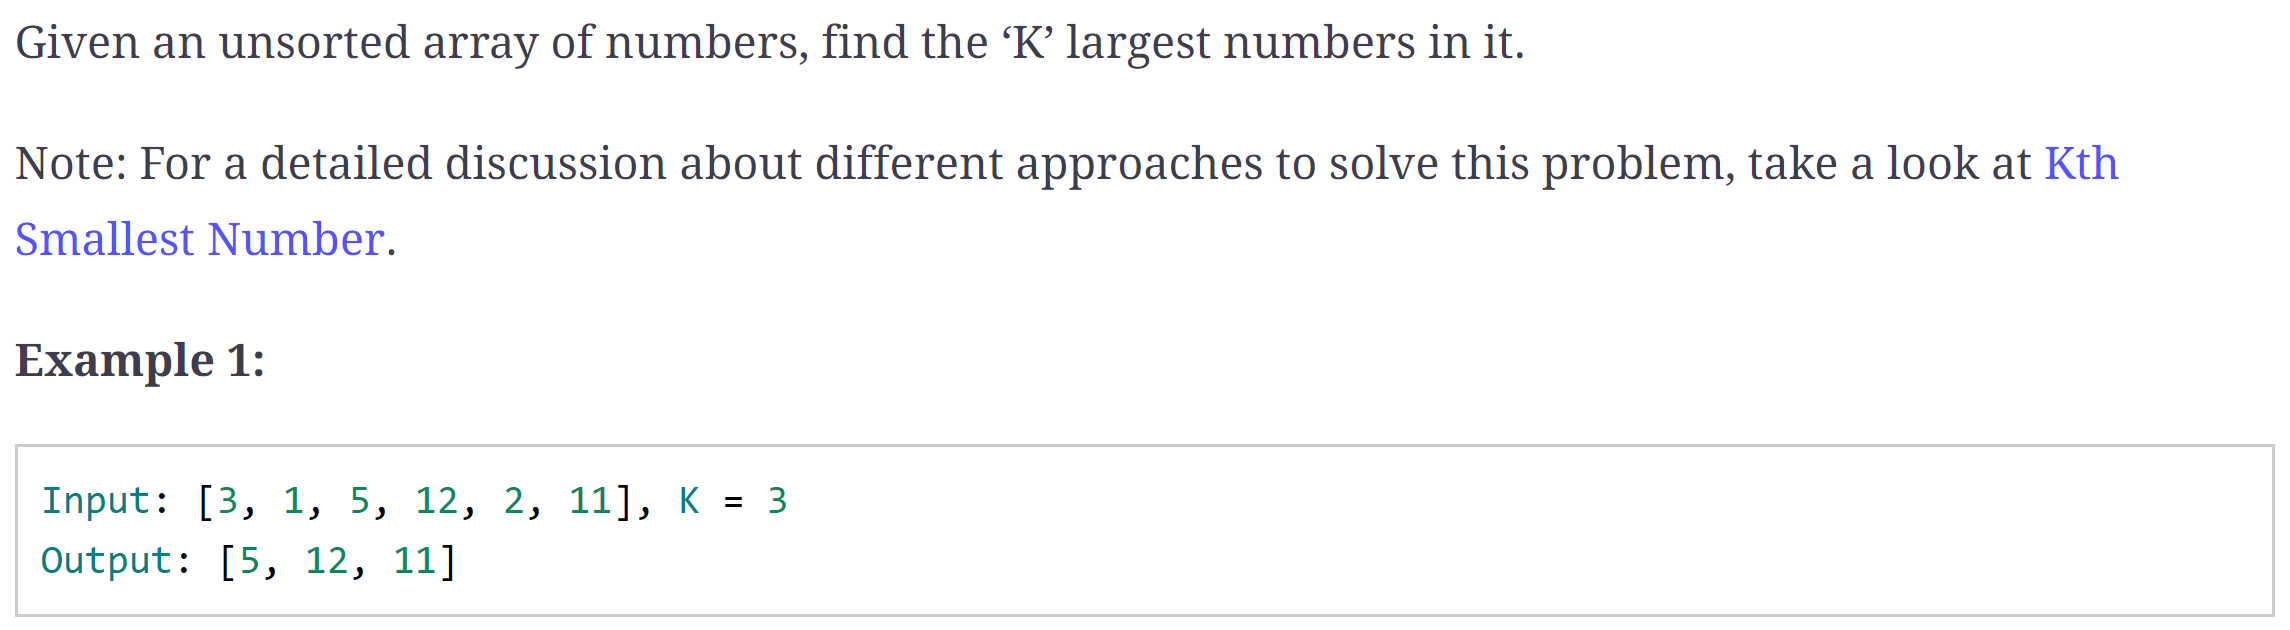

In [1]:
import heapq


def find_k_largest_numbers(nums, k):
    minheap = []
    # O(k)
    for i in range(k):
        heapq.heappush(minheap, nums[i])  # O(logk)

    for i in range(k, len(nums)):  # O(N-k)
        if nums[i] > minheap[0]:
            heapq.heappushpop(minheap, nums[i])  # O(logk)
    return list(minheap)


print(find_k_largest_numbers([3, 6, 5, 2,8, 11], 3))

[6, 11, 8]


### Kth smallest number

In [4]:
import heapq
def kth_smallest(nums,k):
    maxheap = []
    
    for i in range(k):
        heapq.heappush(maxheap, -nums[i])
    
    for i in range(k, len(nums)):
        if nums[i] < maxheap[0]:
            heapq.heappop(maxheap)
            heapq.heappush(maxheap, -nums[i])
    
    return -maxheap[0]
print(kth_smallest([2,4,6,1,8,12], 3))

6


### K closest points to origin

### [Minimum Cost to Connect Sticks](https://leetcode.com/problems/minimum-cost-to-connect-sticks/)

In [ ]:
'''
TC: O(NlogN)
SC: O(N)
'''
import heapq


class Solution:
    def connectSticks(self, sticks: List[int]) -> int:
        minheap = []
        total_cost = 0
        # Add nums to min heap
        for i in range(len(sticks)):
            heapq.heappush(minheap, sticks[i])
        # extract 2 smallest elements and add their cost 
        # push the cost into the minheap
        while len(minheap) > 1:
            cost = heapq.heappop(minheap) + heapq.heappop(minheap)
            total_cost += cost
            heapq.heappush(minheap, cost)
        return total_cost

### [Top K Frequent Elements](https://leetcode.com/problems/top-k-frequent-elements/)

In [ ]:
import heapq


class Solution:
    def topKFrequent(self, nums: List[int], k: int) -> List[int]:
        num_count = {}
        # Get the frequency of each number 
        for i in range(len(nums)):
            if nums[i] not in num_count:
                num_count[nums[i]] = 1
            else:
                num_count[nums[i]] += 1
        
        min_heap = []
        # Add k values to the heap
        for key, val in num_count.items():
            heapq.heappush(min_heap, (val, key))

            if len(min_heap) > k:
                heapq.heappop(min_heap)
        
        result = []
        while min_heap:
            result.append(heapq.heappop(min_heap)[1])
        return result

### [Top k frequenct words](https://leetcode.com/problems/top-k-frequent-words/)

Try to store only K elements in the heap and get the answer. 

In [ ]:
from heapq import *
class Solution:
    def topKFrequent(self, words: List[str], k: int) -> List[str]:
        word_map = {}
        for w in words:
            if w not in word_map:
                word_map[w] = 1
            else:
                word_map[w] += 1
            
        minheap = [(-freq, word) for word, freq in word_map.items()]
        heapify(minheap) # O(N)
        return [heapq.heappop(minheap)[1] for _ in range(k)] #O(klogN)

### [Sort Characters By Frequency](https://leetcode.com/problems/sort-characters-by-frequency/)

In [ ]:
import heapq
class Solution:
    def frequencySort(self, s: str) -> str:
                
        if s == "":
            return s
        char_freq = {}
        # get the frequency of each character
        for c in range(len(s)):
            if s[c] not in char_freq:
                char_freq[s[c]] = 1
            else:
                char_freq[s[c]] += 1
                

        minheap = []
        
        # Add all values to the minheap
        for key, val in char_freq.items():
            heapq.heappush(minheap, (val, key))

        # Extract the character with least frequency and add it to the end of the result string
        result = ""
        while minheap:
            letter, frequency = heapq.heappop(minheap)
            result = (letter)*frequency + result
        return result
        

### [Kth Largest Element in an Array](https://leetcode.com/problems/kth-largest-element-in-an-array/)

In [ ]:
class Solution:
    def findKthLargest(self, nums: List[int], k: int) -> int:
        heap_list=[]
        for num in nums:
            heapq.heappush(heap_list,num)
            if(len(heap_list)>k):
                heapq.heappop(heap_list)
        return heap_list[0]

### [Kth Largest Number in a Stream](https://leetcode.com/problems/kth-largest-element-in-a-stream/)

In [ ]:
import heapq
class KthLargest:

    def __init__(self, k: int, nums: List[int]):
        self.heap = []
        self.k = k
        for num in nums:
            self.add(num)

    def add(self, val: int) -> int:
        heapq.heappush(self.heap, val)
        
        if len(self.heap) > self.k:
            heapq.heappop(self.heap)
        return self.heap[0]
    
# Your KthLargest object will be instantiated and called as such:
# obj = KthLargest(k, nums)
# param_1 = obj.add(val)

### [Find k closest numbers](https://leetcode.com/problems/find-k-closest-elements/)

In [ ]:
'''
Binary search

'''

class Solution:
    def findClosestElements(self, arr: List[int], k: int, x: int) -> List[int]:
        if len(arr)<=1:
            return arr
        index = self.binarysearch(arr,x, 0, len(arr)-1)
        left = index
        right = index + 1
        result = []
        size = len(arr)
        for i in range(k):
            if left >= 0 and right <size:
                diff_1 = abs(x - arr[left])
                diff_2 = abs(x - arr[right])
                if diff_1 <= diff_2:
                    result.insert(0,arr[left])
                    left -= 1
                else:
                    result.append(arr[right])
                    right += 1
            elif left > 0:
                result.insert(0,arr[left])
                left -= 1
            elif right < size:
                result.append(arr[right])
                right += 1
        return result


    def binarysearch(self, arr,x, low, high):
        
        while low<= high:
            
            mid = low+(high-low)//2
            
            
            if arr[mid]==x:
                return mid

            elif arr[mid]<x:
                low = mid+1

            else:
                high = mid-1
            
        return mid

## k-way merge

### Find k smallest number in a matrix

In [ ]:
import heapq
class Solution:
    def kthSmallest(self, matrix: List[List[int]], k: int) -> int:
        if not matrix:
            return 0
        minheap = []
        for i in range(len(matrix)):
            heapq.heappush(minheap, (matrix[i][0],0, matrix[i]))
            
        count = 0
        while minheap:
            number, i, row = heapq.heappop(minheap)
            count += 1
            
            if count == k:
                break
                
            if len(row) > i+1:
                heapq.heappush(minheap, (row[i+1], i+1, row))
                
        return number

### [Merge K Sorted Lists](https://leetcode.com/problems/merge-k-sorted-lists)

In [ ]:
# Definition for singly-linked list.
# class ListNode:
#     def __init__(self, x):
#         self.val = x
#         self.next = None

from heapq import *


class Solution:
    def mergeKLists(self, lists: List[ListNode]) -> ListNode:

        K = len(lists)
        minheap = []
        temp = result = ListNode(-1)

        for i in range(K):

            head = lists[i]
            while head:
                heappush(minheap, head.val)
                head = head.next
        while minheap:
            result.next = ListNode(heappop(minheap))
            result = result.next

        return temp.next

### Kth Smallest Number in M Sorted Lists

### Smallest Number Range

### [Find K Pairs with Smallest Sums](https://leetcode.com/problems/find-k-pairs-with-smallest-sums/)

### [Find Median from Data Stream](https://leetcode.com/problems/find-median-from-data-stream/)

### [Sliding Window Median](https://leetcode.com/problems/sliding-window-median/)

### [Maximize capital/ IPO](https://leetcode.com/problems/ipo/)

### [Next Interval](https://leetcode.com/problems/find-right-interval/)

## Two heaps

### [Find median in a stream](https://leetcode.com/problems/find-median-from-data-stream/)

In [ ]:
class MedianFinder:

    def __init__(self):
        """
        initialize your data structure here.
        """
        self.minheap = []
        self.maxheap = []
        

    def addNum(self, num: int) -> None:
        if not self.maxheap or -self.maxheap[0] >= num:
            heapq.heappush(self.maxheap, -num)
        else:
            heapq.heappush(self.minheap, num)
        
        # idea: Either both heaps should have equal num of elements or maxheap should have one element more
        if len(self.maxheap) > len(self.minheap) + 1:
            heapq.heappush(self.minheap, -heapq.heappop(self.maxheap))
        elif len(self.maxheap) < len(self.minheap):
            heapq.heappush(self.maxheap, -heapq.heappop(self.minheap))

    def findMedian(self) -> float:
        if len(self.maxheap) == len(self.minheap):
            return ((-self.maxheap[0]) + self.minheap[0]) / 2
        else:
            return -self.maxheap[0]/1
        


# Your MedianFinder object will be instantiated and called as such:
# obj = MedianFinder()
# obj.addNum(num)
# param_2 = obj.findMedian()